# The problem
Predicting the value of a house from set of parameters - univariate multiple regression problem. 

# Performance measure
RMSE (l_2), it could also be Mean Absolute Error (l_1)



The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

# Assumptions

The predicted prices will be used as numerical values after delivering them downstream


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

# Load data

In [3]:
data_file = 'data/house.csv'
housing = pd.read_csv(data_file)

According to the task, only some columns of the dataset are to be used

In [4]:
features = ['id', 'date', 'price', 'price_bin',
                 'bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'floors', 'waterfront',
                'view', 'condition', 'grade', 
                'sqft_above', 'sqft_basement', 'yr_built']

housing = housing[features]

# First look at the data

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
price_bin        21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


No columns contain null values - perfect, additionally, all of the attributes are numerical

In [6]:
housing.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000


In [7]:
housing.head()

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,20141013T000000,221900.0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,5631500400,20150225T000000,180000.0,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,2487200875,20141209T000000,604000.0,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,1954400510,20150218T000000,510000.0,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


To clarify - what does 0.75 bathroom look like? Why are the floors not an integer?

In [8]:
housing[housing['bathrooms'] % 1 != 0]

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
5,7237550310,20140512T000000,1230000.0,1,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001
6,1321400060,20140627T000000,257500.0,0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995
7,2008000270,20150115T000000,291850.0,0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963
9,3793500160,20150312T000000,323000.0,0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009
21609,6600060120,20150223T000000,400000.0,0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014
21610,1523300141,20140623T000000,402101.0,0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009
21611,291310100,20150116T000000,400000.0,0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004


In [9]:
housing[housing['floors'] % 1 != 0]

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
12,114101516,20140528T000000,310000.0,0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927
14,1175000570,20150312T000000,530000.0,0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900
17,6865200140,20140529T000000,485000.0,0,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916
25,1202000200,20141103T000000,233000.0,0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941
27,3303700376,20141201T000000,667000.0,0,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21345,3630200480,20140612T000000,680000.0,0,3,2.50,2570,3600,2.5,0,0,3,9,2570,0,2007
21386,774101755,20150417T000000,320000.0,0,3,1.75,1790,66250,1.5,0,0,3,7,1790,0,2003
21457,3629700120,20141014T000000,669950.0,0,3,3.00,2330,1944,2.5,0,0,3,8,1950,380,2014
21502,2770601782,20140801T000000,453000.0,0,3,2.50,1510,1618,2.5,0,0,3,8,1330,180,2011


There are multiple records with values that are not whole numbers, so this does not seem like a mistake. "For now, we can assume that the 0.75 bathroom is a bathroom without a shower/bathtub, and that the 'uneven' floors are non-standard, e.g. the attic. 

In a real project, this would be a great moment to ask about this kind of issues.

In [10]:
housing['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

Additional information on the 'view' property would be nice. Is the view getting better with the grades? Or is it lack of view (0) and different, but not necesarrily better views (1-4). If the latter is true, one hot encoding might be needed. For now, I'll assume that the view is getting better with the value of this property.

# Preliminary cleaning

Since the 'id' column does not provide us with any additional information, we will get rid of it so that the model does not try to learn from this feature.

In [11]:
# TODO: move this to a pipeline
housing.drop(['id'], axis=1, inplace=True)

# Train-test split

Lets split the data to not leak any information from the set we will be testing on.

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [27]:
# In case the full set is needed
housing_full = housing.copy()

# The data that will be used for training
housing = train_set.copy()

# Data exploration

Now we focus on the date - lets examine how long was the data colected for

In [65]:
dates = pd.to_datetime(housing['date'])
print(f'Colection period: {max(dates) - min(dates)}')

Colection period: 387 days 00:00:00


The data comes from a period, which is over a year long. This seems long enough to observe possible correlation with price. We will check this in further steps. For now, the attribute will be converted to int value for easier usage.

In [66]:
dates -= min(dates)
housing['date'] = dates.dt.days

In [67]:
housing.head()

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
6325,25,325000.0,0,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983
13473,312,257000.0,0,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929
17614,300,228500.0,0,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942
16970,251,288000.0,0,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977
20868,350,479000.0,0,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007


Lets now take a look at the distributions. This is not a very big data and we do not have too many features. Thus, we have chance to plot most of them and reach some useful analytical results. 

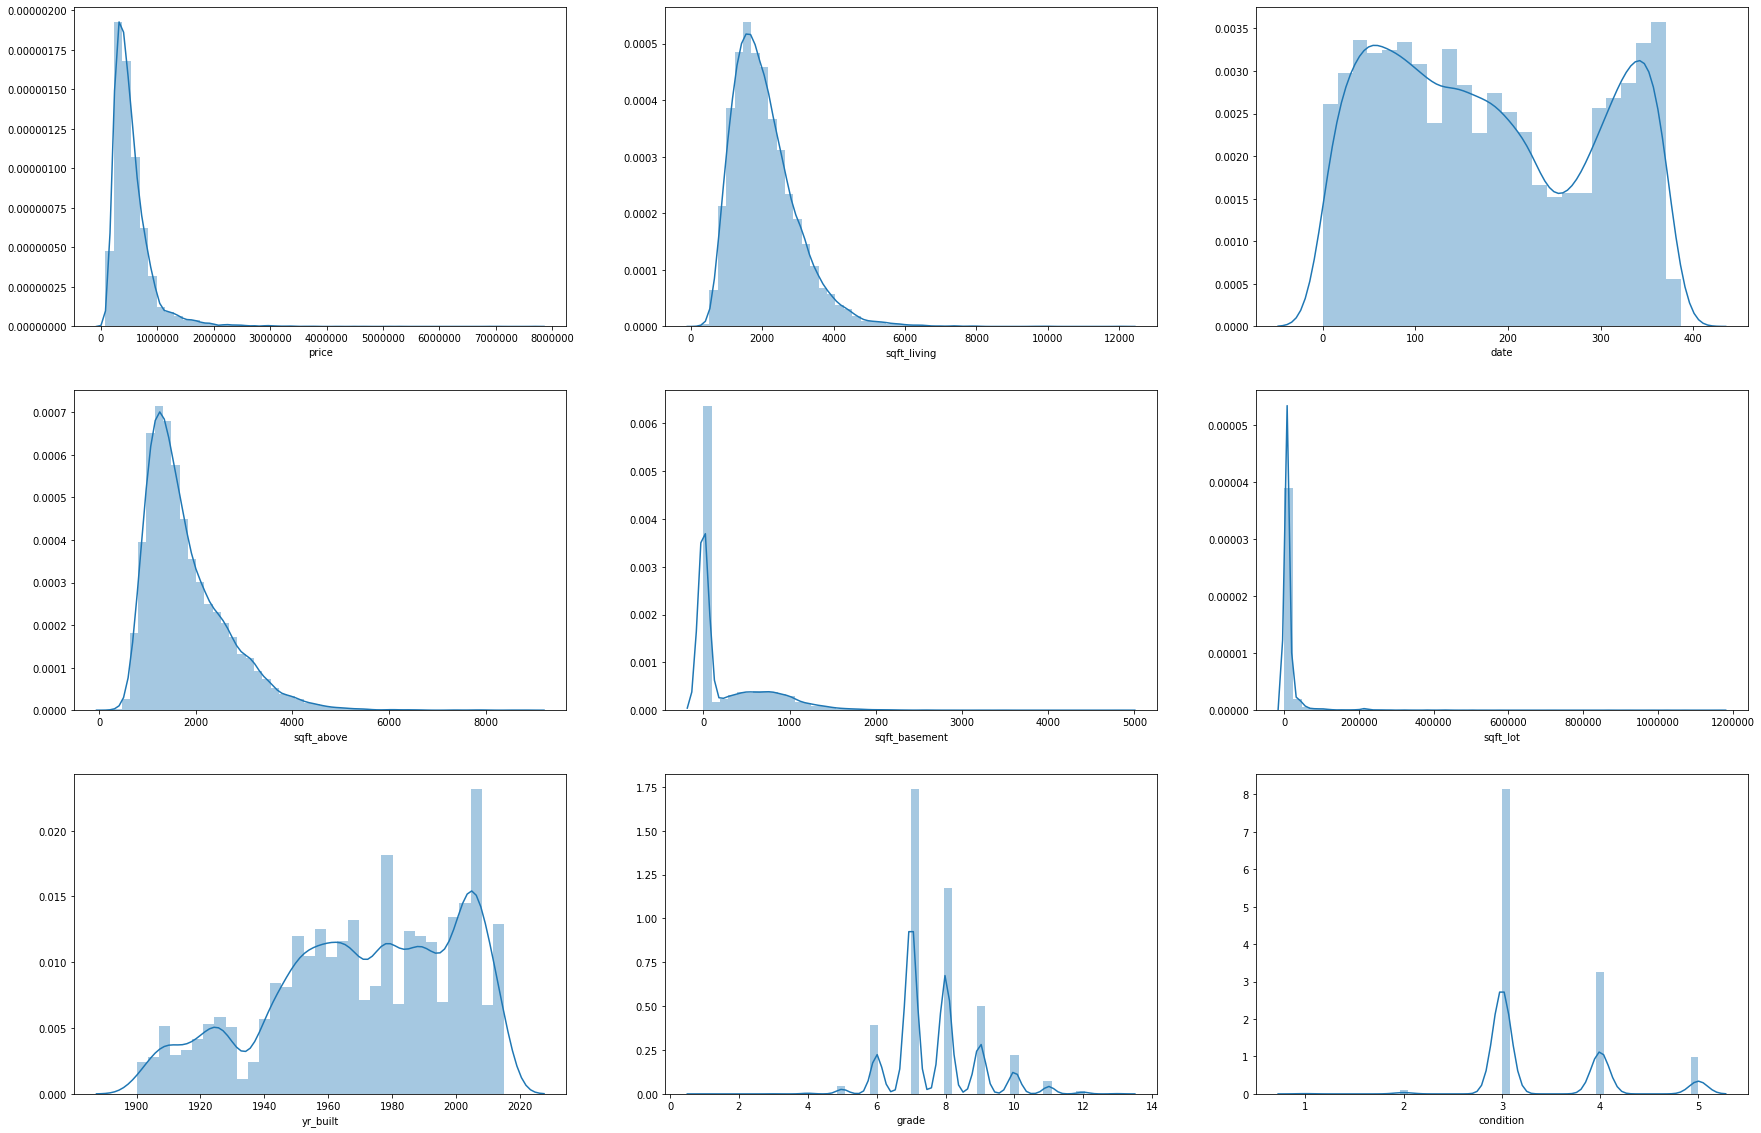

In [68]:
columns_to_plot = ['price', 'sqft_living', 'date',
                   'sqft_above', 'sqft_basement', 'sqft_lot',
                   'yr_built', 'grade', 'condition']

nrow, ncol = 3, 3
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize = (30, 20))

for i, column in enumerate(columns_to_plot):
    sns.distplot(housing[column], ax=axes[i//nrow, i%ncol])

We can already see some possible problems with this dataset:

The properties have different ranges, from [0-1] range ('waterfront'), to [0-10000] range ('sqft_living'). This might cause problems for some algorithms and make the gradient descent slower. 

Additionally, 'bedrooms' and 'sqft_lot' have a very long-tailed distribution. This might indicate the presence of outliers/errors in the dataset, which might be pesky to deal with later, so we will examine and try to clean up before creating a model.However, determining their possible negative effect will be time consuming and in the real data sets there will always be some outliers like some luxury house prices in this dataset. That's why I am not planning to remove outliers, only errors.


Let's examine the bedrooms first:

In [69]:
counts = housing['bedrooms'].value_counts(ascending=True)
print(counts)

33       1
10       2
9        5
0        8
8        9
7       29
1      153
6      212
5     1292
2     2237
4     5477
3     7865
Name: bedrooms, dtype: int64


As suspected, we have the most data in the 1-6 bedroom range, with several outliers - one of the houses has 33 bedrooms, and some of them have none (!). Let's examine them and see if we can find a pattern

In [70]:
housing.loc[(housing['bedrooms'] == 33)]

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
15870,54,640000.0,0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947


33 bedrooms in 1620sqft seems very suspicious. Lets compare this with similar apartments:

In [71]:
housing.loc[housing['sqft_living'] == 1620].describe()

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,83.000000,83.000000,83.0,83.000000,83.000000,83.0,83.000000,83.000000,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,176.506024,443350.578313,0.0,3.469880,1.870482,1620.0,10357.048193,1.530120,0.0,0.216867,3.506024,7.265060,1440.000000,180.000000,1965.409639
std,117.330612,145783.360677,0.0,3.328873,0.511099,0.0,25407.536708,0.631246,0.0,0.827105,0.722014,0.564916,243.570994,243.570994,31.152667
min,3.000000,218000.000000,0.0,2.000000,1.000000,1620.0,997.000000,1.000000,0.0,0.000000,3.000000,6.000000,830.000000,0.000000,1900.000000
25%,75.000000,333975.000000,0.0,3.000000,1.500000,1620.0,3777.500000,1.000000,0.0,0.000000,3.000000,7.000000,1220.000000,0.000000,1947.000000
50%,153.000000,430000.000000,0.0,3.000000,1.750000,1620.0,6000.000000,1.500000,0.0,0.000000,3.000000,7.000000,1620.000000,0.000000,1966.000000
75%,309.500000,525000.000000,0.0,3.000000,2.250000,1620.0,8128.500000,2.000000,0.0,0.000000,4.000000,8.000000,1620.000000,400.000000,1989.000000
max,374.000000,842000.000000,0.0,33.000000,2.750000,1620.0,219542.000000,3.000000,0.0,4.000000,5.000000,9.000000,1620.000000,790.000000,2014.000000


As expected, the actual number of bedrooms in similar apartments is much lower, around 3.5. We can assume for now that this value has been entered incorrectly, and change it to the mean (4), as most of the other fields for this record seem to be in the correct range.

In [72]:
housing.loc[15870, 'bedrooms'] = 4

Now, let's check the apartments with no bedrooms or bathrooms.

In [73]:
rooms_outlier = housing.loc[(housing['bedrooms'] == 0) | (housing['bathrooms'] == 0)]
rooms_outlier.head()

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
3119,279,380000.0,0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006
3467,95,288000.0,0,0,1.5,1430,1650,3.0,0,0,3,7,1430,0,1999
1149,291,75000.0,0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966
6994,53,1300000.0,1,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990
19452,147,142000.0,0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963


In [74]:
rooms_outlier.describe()

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.0,11.000000,11.000000,11.00000,11.000000,11.0,11.000000
mean,193.363636,3.524500e+05,0.090909,0.272727,0.681818,1317.636364,15053.00000,1.636364,0.0,0.181818,2.818182,6.00000,1317.636364,0.0,1971.818182
std,93.969434,3.348026e+05,0.301511,0.467099,1.031327,1263.875569,13745.03052,0.809040,0.0,0.603023,0.873863,3.03315,1263.875569,0.0,29.862412
min,53.000000,7.500000e+04,0.000000,0.000000,0.000000,290.000000,979.00000,1.000000,0.0,0.000000,1.000000,1.00000,290.000000,0.0,1913.000000
25%,142.500000,1.850000e+05,0.000000,0.000000,0.000000,635.000000,4969.00000,1.000000,0.0,0.000000,2.500000,3.50000,635.000000,0.0,1951.500000
50%,153.000000,2.800000e+05,0.000000,0.000000,0.000000,844.000000,7111.00000,1.000000,0.0,0.000000,3.000000,7.00000,844.000000,0.0,1966.000000
75%,285.000000,3.500000e+05,0.000000,0.500000,1.250000,1480.000000,23872.50000,2.000000,0.0,0.000000,3.000000,7.00000,1480.000000,0.0,1999.000000
max,346.000000,1.300000e+06,1.000000,1.000000,2.500000,4810.000000,43377.00000,3.000000,0.0,2.000000,4.000000,12.00000,4810.000000,0.0,2006.000000


We have 11 records, that have either 0 bedrooms, or 0 bathrooms. Once again, we would want clarify whether it is an error or is this one of the use cases for our final model (e.g. predicting prices of garages). For now, we will just get rid of those records.  

In [75]:
housing.drop(rooms_outlier.index, inplace=True)

### Quick price review

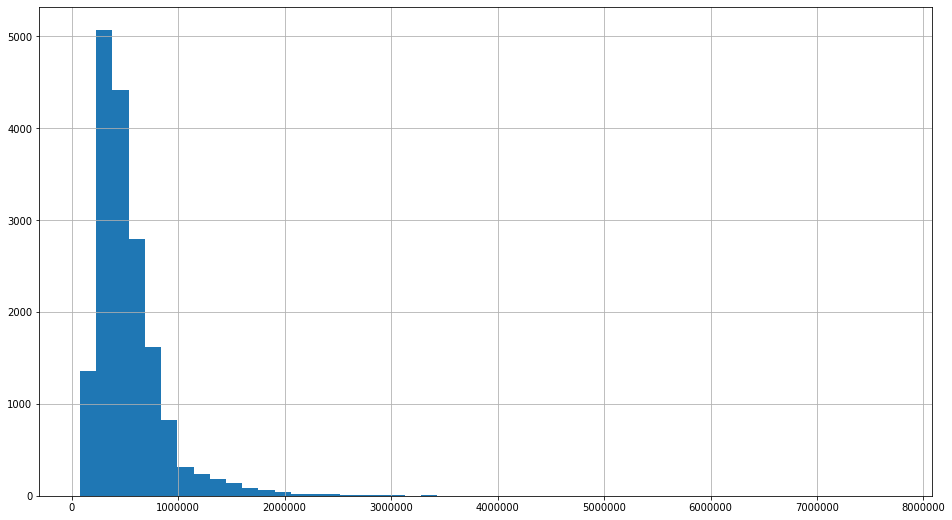

In [76]:
housing['price'].hist(bins=50, figsize=(16, 9))

A very long-tailed distribution, with several outliers. Just like in the real world, there are probably a few mansions that are way outside of the 'ordinary' price range. Just to be sure we dont have errors, lets check a few records from the top:

In [77]:
housing.sort_values(by=['price'], ascending=False).head(10)

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
7252,164,7700000.0,1,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910
3914,40,7060000.0,1,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940
9254,140,6890000.0,1,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001
1315,346,5300000.0,1,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991
1164,171,5110000.0,1,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999
8092,46,4670000.0,1,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983
8638,47,4490000.0,1,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001
12370,369,4210000.0,1,5,6.00,7440,21540,2.0,0,0,3,12,5550,1890,2003
7035,60,3800000.0,1,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978
19017,132,3800000.0,1,3,4.25,5510,35000,2.0,0,4,3,13,4910,600,1997


This looks possible, as all of these properties have a very high grade, huge living area and are in decent condition.

# Correlation Matrix

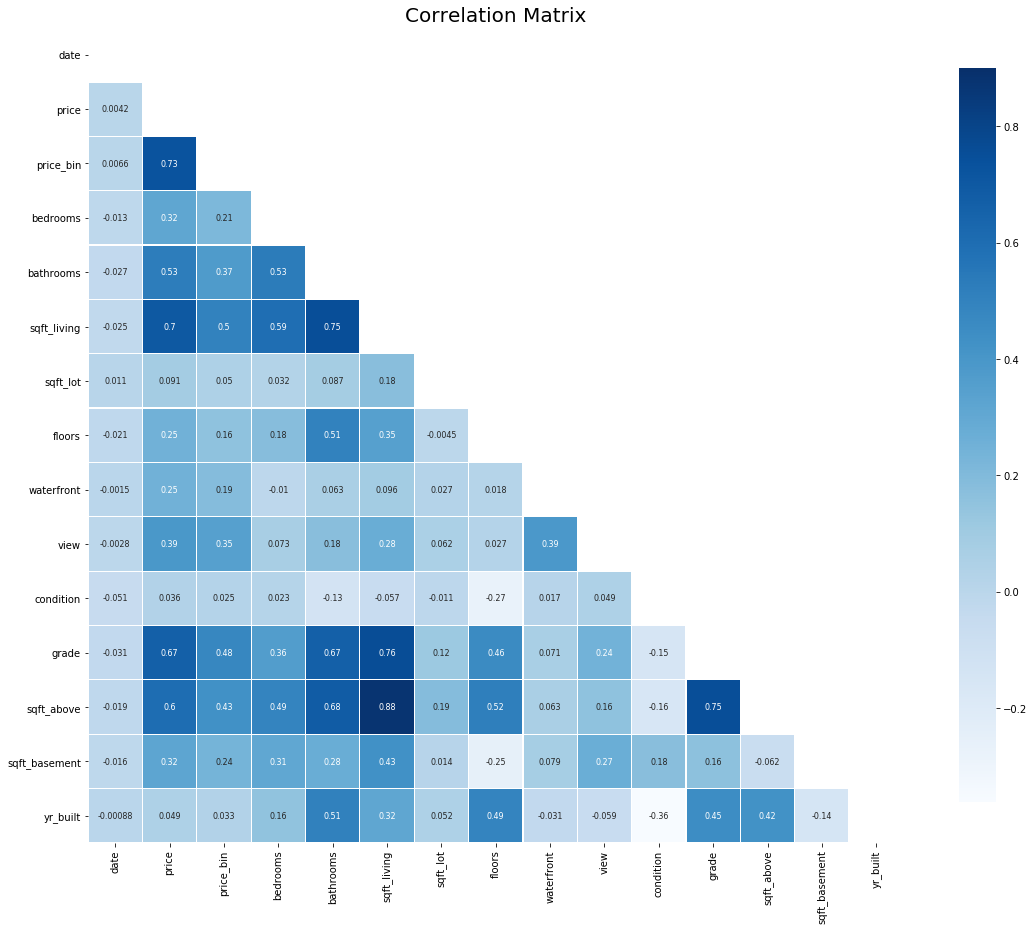

In [78]:
features = ['date', 'price', 'price_bin',
             'bedrooms', 'bathrooms', 'sqft_living',
             'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built']

mask = np.zeros_like(housing[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 15))
plt.title('Correlation Matrix',fontsize=20)

sns.heatmap(housing[features].corr(),linewidths=0.25,vmax=0.9,square=True, cmap='Blues',
            linecolor='w',annot=True,annot_kws={'size':8}, mask=mask, cbar_kws={'shrink': .9});

At this stage, we can start questioning if the 'grade' column is really the slope of the lot. It has a very high correlation with price, and at the same time, there seems to be no flat lots, with the majority of them having 7-8° (see below), which seems suspicious.

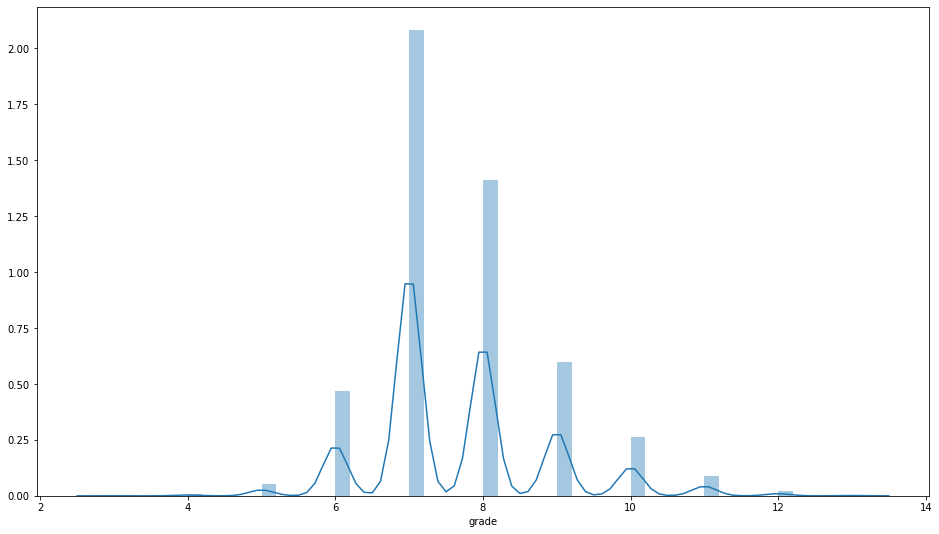

In [79]:
sns.distplot(housing['grade'])

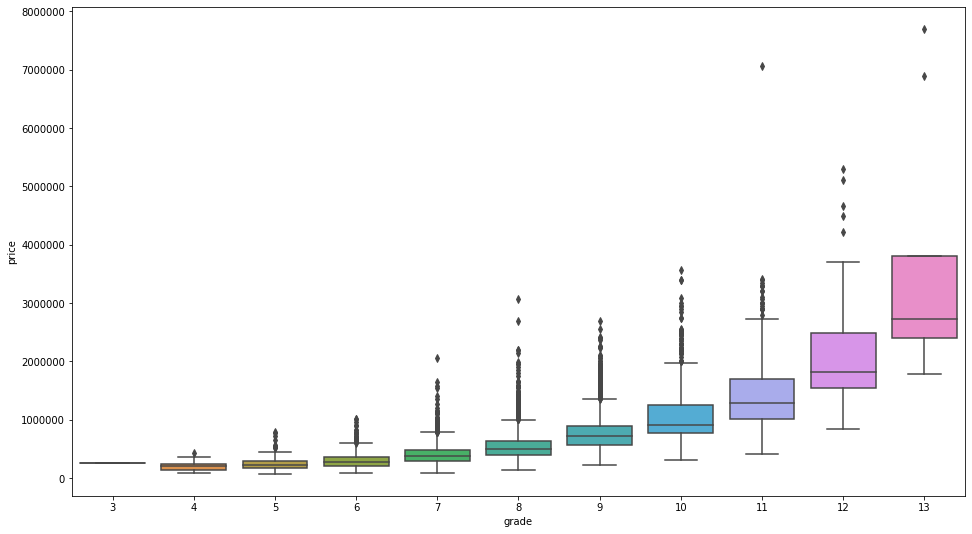

In [80]:
f, axe = plt.subplots(1, 1, figsize=(16,9))
sns.boxplot(x=housing['grade'], y=housing['price'], ax = axe)

Since the data is for King County, WA, this seems to be a better, and more fitting description of grade:
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

SOURCE: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

This would explain a very high correlation with price much bettar than the lot slope.

## Feature selection



Having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

Another important thing is correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. This relation can be estimated when we look at the definitions in the dataset but to be sure correlation matrix should be checked. However, this does not mean that you must remove one of the highly correlated features. For example: bathrooms and sqrt_living. They are highly correlated but I do not think that the relation among them is the same as the relation between sqt_living and sqt_above.


In [81]:
train_features_all = housing.columns.drop(['price', 'price_bin'])
print(train_features)
train_features_selected = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
                         'waterfront', 'view', 'grade', 'yr_built']

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built'],
      dtype='object')


# Creating simple regression model

In [153]:
X_train = housing[train_features_all]
y_train = housing['price']

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Create df to store results
regression_results = pd.DataFrame(columns=['Name', 'Info', 'RMSE (train)', 'R2 (train)', 'mean_validation', 'std_validation'])

#Calculate metrics we are interested in
def evaluate_model(model, X, y, name, info='', scoring='neg_mean_squared_error', cv=5):
    predictions = model.predict(X)
    rmse = np.sqrt(metrics.mean_squared_error(y, predictions))
    r2 = metrics.r2_score(y, predictions)
    
    scores = cross_val_score(model, X, y,
                             scoring=scoring, cv=cv)
    scores = np.sqrt(-scores)
    mean_validation = scores.mean()
    std_validation = scores.std()
    
    print(f'{name} \t RMSE: {rmse:.2f}, R2: {r2:.2f}, mean_val: {mean_validation:.2f}, std_val: {std_validation:.2f}')
    
    nrow = regression_results.shape[0]
    regression_results.loc[nrow] = [name, info, rmse, r2, mean_validation, std_validation]
    

In [149]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
evaluate_model(lin_reg, X_train, y_train, name='lin_reg1', info='All features')

ridge_reg 	 RMSE: 212662.24, R2: 0.65, mean_val: 212747.83, std_val: 12720.07


In [133]:
lin_reg_selected = linear_model.LinearRegression()
lin_reg_selected.fit(X_train[selected_features], y_train)

evaluate_model(lin_reg_selected, X_train[selected_features], y_train, name='lin_reg_selected', info='Selected features')

lin_reg_selected 	 RMSE: 213464.31, R2: 0.65, mean_val: 213486.79, std_val: 12594.43


In [134]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

evaluate_model(tree_reg, X_train, y_train, name='Decision Tree', info='All features')

Decision Tree 	 RMSE: 0.00, R2: 1.00, mean_val: 261101.04, std_val: 8707.68


The decision tree overifts the training set and gets worse predictions

In [136]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

evaluate_model(forest_reg, X_train, y_train, name='Random Forest', info='All features')

Random Forest 	 RMSE: 70663.78, R2: 0.96, mean_val: 187935.11, std_val: 7076.74


In [139]:
forest_reg_selected = RandomForestRegressor(random_state=42)
forest_reg_selected.fit(X_train[selected_features], y_train)

evaluate_model(forest_reg_selected, X_train[selected_features], y_train, name='Random Forest', info='Selected features')

Random Forest 	 RMSE: 76403.35, R2: 0.96, mean_val: 196076.09, std_val: 6335.79


The Random Forest regressor returns the best results on the cross-validation

Let's also try XGBoost and see if we can get better predictions on non-normalized data

Looks like the Random Forest Regressor performs the best out of the reviewed models

Lets try more data preprocessing now:

In [137]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror')
xgb.fit(X_train, y_train)

evaluate_model(xgb, X_train, y_train, name='XGBoost', info='All features')

/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is

XGBoost 	 RMSE: 171932.14, R2: 0.77, mean_val: 187402.35, std_val: 5795.76


In [142]:
xgb_selected = XGBRegressor(objective ='reg:squarederror')
xgb_selected.fit(X_train[selected_features], y_train)

evaluate_model(xgb_selected, X_train[selected_features], y_train, name='XGBoost', info='Selected features')

/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is depreca

XGBoost 	 RMSE: 175640.22, R2: 0.76, mean_val: 189210.18, std_val: 5753.08


In [146]:
regression_results.sort_values(by=['mean_validation'], inplace=True)
regression_results

,Name,Info,RMSE (train),R2 (train),mean_validation,std_validation
5,XGBoost,All features,171932.142589,0.774029,187402.345105,5795.755174
4,Random Forest,All features,70663.777893,0.961829,187935.112887,7076.741995
3,Random Forest,All features,72310.666171,0.960029,188338.249937,5992.596043
7,XGBoost,Selected features,175640.222336,0.764177,189210.176979,5753.084622
6,Random Forest,Selected features,76403.348799,0.955377,196076.085846,6335.792643
0,lin_reg1,All features,212661.850472,0.654286,212748.383408,12715.713824
1,lin_reg_selected,Selected features,213464.308417,0.651672,213486.793291,12594.425697
2,Decision Tree,All features,0.000000,1.000000,261101.035259,8707.684052


In [151]:
# Classification

In [152]:
X_train = housing[train_features_all]
y_train = housing['price_bin']

In [156]:
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
def evaluate_model(model, X, y, name, info='', scoring='neg_mean_squared_error', cv=5):
    predictions = model.predict(X)
    rmse = np.sqrt(metrics.mean_squared_error(y, predictions))
    r2 = metrics.r2_score(y, predictions)
    
    scores = cross_val_score(model, X, y,
                             scoring=scoring, cv=cv)
    scores = np.sqrt(-scores)
    mean_validation = scores.mean()
    std_validation = scores.std()
    
    print(f'{name} \t RMSE: {rmse:.2f}, R2: {r2:.2f}, mean_val: {mean_validation:.2f}, std_val: {std_validation:.2f}')
    
    nrow = regression_results.shape[0]
    regression_results.loc[nrow] = [name, info, rmse, r2, mean_validation, std_validation]

Looks like the feature selecte

In [148]:
## Feature engineering & scaling

In [ ]:
housing_scaled = housing.copy()

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer


X_train_prepared = X_train.copy()
housing_pipeline = Pipeline([
    ('std_scaler', RobustScaler())
])

full_pipeline = ColumnTransformer(housing_pipeline)

train_columns = X_train.columns
scaler = RobustScaler(quantile_range = (10, 90))
columns_to_standarize = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

columns_to_normalize = [x for x in train_columns if x not in columns_to_standarize]

X_train_prepared[columns_to_standarize] = scaler.fit_transform(X_train[columns_to_standarize]) 


# df[df.columns] = scaler.fit_transform(df[df.columns])


In [154]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(random_state=42)
mlp_reg.fit(X_train, y_train)

evaluate_model(mlp_reg, X_train, y_train, name='MLP', info='All features')

/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptr

MLP 	 RMSE: 245602.88, R2: 0.54, mean_val: 405229.25, std_val: 115902.74


/home/pablo/Desktop/IT/housing/ml_cpu/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f7c21e130>,
      dtype=object)

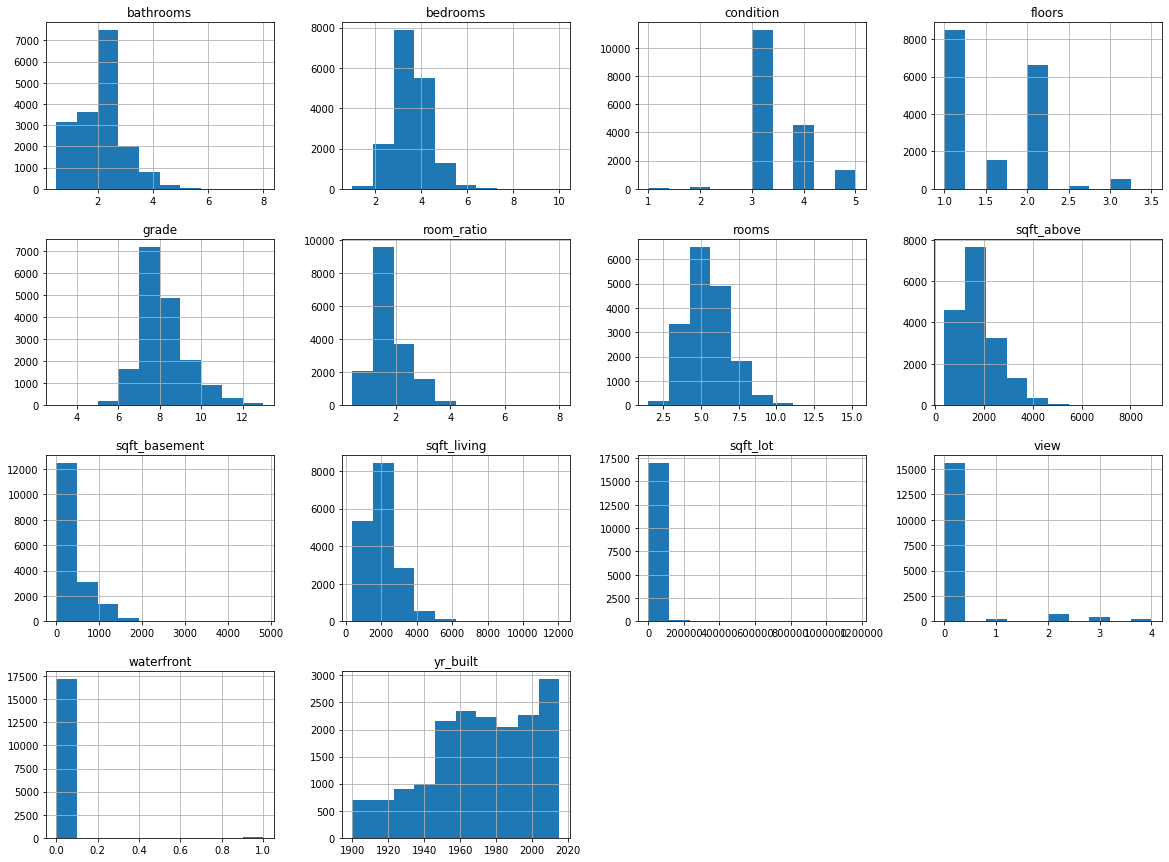

In [130]:
X_train_prepared.hist(figsize=(20, 15))

In [54]:
xgb.predict(X_train.head())

array([513273.56, 365918.5 , 252862.86, 398369.06, 479351.25],
      dtype=float32)

In [141]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': list(range(10, 100, 5)),
    'max_features': list(range(4, 12)),
    'max_depth' : list(range(5, 50, 5))
}

forest_reg = RandomForestRegressor()
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 return_train_score=True, 
                                n_jobs=-1, n_iter=100)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [142]:
rand_search.best_params_

{'n_estimators': 95, 'max_features': 9, 'max_depth': 15}

In [143]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=95, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [145]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

162556.96476248658 {'n_estimators': 55, 'max_features': 6, 'max_depth': 45}
164326.84842601226 {'n_estimators': 30, 'max_features': 4, 'max_depth': 30}
162121.671290075 {'n_estimators': 95, 'max_features': 10, 'max_depth': 40}
161712.82681544463 {'n_estimators': 70, 'max_features': 6, 'max_depth': 15}
163046.34358257975 {'n_estimators': 30, 'max_features': 10, 'max_depth': 15}
162028.19909822172 {'n_estimators': 80, 'max_features': 5, 'max_depth': 25}
165733.35418671955 {'n_estimators': 35, 'max_features': 5, 'max_depth': 40}
162385.89080506485 {'n_estimators': 65, 'max_features': 10, 'max_depth': 10}
175482.9945130514 {'n_estimators': 15, 'max_features': 8, 'max_depth': 5}
169747.17363271271 {'n_estimators': 10, 'max_features': 6, 'max_depth': 20}
164347.24042933848 {'n_estimators': 30, 'max_features': 6, 'max_depth': 10}
162525.00200760204 {'n_estimators': 45, 'max_features': 6, 'max_depth': 35}
173375.12748049598 {'n_estimators': 75, 'max_features': 9, 'max_depth': 5}
166249.7609927